In [1]:
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
import torch.nn as nn
from torchvision import datasets, transforms
import numpy as np
#plotting and visualization library
import matplotlib.pyplot as plt
#Display on the notebook
%matplotlib inline 
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
# Define the transforms to apply to the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the CIFAR-100 dataset
trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=True, transform=transform)

# Define the data loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)


  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
import torch

# check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [4]:
import torch
import torchvision.models as models

# Load the pretrained ResNet-18 model
model = models.resnet18(pretrained=True).to(device)

# Freeze all the model parameters
# for param in model.parameters():
#     param.requires_grad = False

# Replace the last fully connected layer with a new one
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 100)

# Set the model to training mode
# model.train()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [5]:
# Define the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters())

# Train the model for 10 epochs
num_epochs = 10

In [6]:
device

device(type='cuda')

In [7]:
def Train_f(trainloader,criterion,optimizer,num_epochs,model):
    train_loss = []
    train_acc = []
    epoch_loss_hist = []
    epoch_acc_hist = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        
        for i, data in enumerate(trainloader, 0):
            # Get the inputs and labels
            inputs, labels = data
            inputs,labels = inputs.to(device),labels.to(device)
            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Update statistics
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # # Print statistics every 100 batches
            # if i % 1000 == 999:
            #     print(f'Epoch {epoch + 1}, Batch {i + 1}: Loss {running_loss / 100:.4f}, Accuracy {100 * correct / total:.2f}%')
            #     train_loss.append(running_loss / 100)
            #     train_acc.append(100 * correct / total)
            #     running_loss = 0.0
        epoch_loss = running_loss/total
        running_loss= 0
        epoch_acc = 100*correct/total
        epoch_acc_hist.append(epoch_acc)
        epoch_loss_hist.append(epoch_loss)
        print(f'Epoch {epoch + 1} Loss {epoch_loss}, Accuracy {epoch_acc}%')
    import matplotlib.pyplot as plt

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # plot the training accuracy in the first subplot
    axs[0].plot(epoch_acc_hist)
    axs[0].set_title('Training Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Accuracy')

    # plot the training loss in the second subplot
    axs[1].plot(epoch_loss_hist)
    axs[1].set_title('Training Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Loss')
    # epoch_loss_hist,epoch_acc_hist = epoch_loss_hist.to(device),epoch_acc_hist.to(device)
    return epoch_loss_hist,epoch_acc_hist


In [8]:
def Test(model,testloader):
    model.eval()

    test_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * labels.size(0)
            _, predicted = torch.topk(outputs, 5, dim=1)
            total += labels.size(0)
            for i in range(labels.size(0)):
                if labels[i] in predicted[i]:
                    correct += 1

        test_loss /= len(testloader.dataset)
        test_acc = 100 * correct / total
        print(f'Test Loss: {test_loss:.4f} | Top-5 Testing Accuracy: {test_acc:.2f}%')

    # Plot the training and testing loss curves
    import matplotlib.pyplot as plt

    # # plt.plot(train_loss, label='Training Loss')
    # plt.plot(test_loss, label='Testing Loss')
    # plt.xlabel('Batch')
    # plt.ylabel('Loss')
    # plt.legend()
    # plt.show()
    return test_acc


#Adam

Epoch 1 Loss 0.5239302649497986, Accuracy 17.424%
Epoch 2 Loss 0.5188997511649132, Accuracy 17.38%


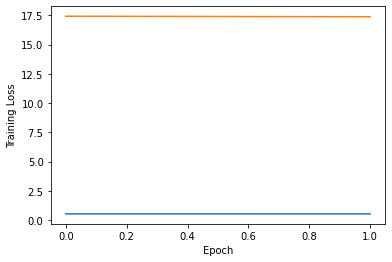

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999))
train_loss,train_acc = Train_f(trainloader,criterion,optimizer,2,model)

## Changing the Values of Parameter Beta1

In [9]:
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

for beta1 =  0.7
Epoch 1 Loss 0.1253015781854198, Accuracy 7.336%
Epoch 2 Loss 0.09314799410581588, Accuracy 23.232%
Epoch 3 Loss 0.07837772723197937, Accuracy 33.692%
Epoch 4 Loss 0.0682505949139595, Accuracy 41.22%
Epoch 5 Loss 0.060223725154399874, Accuracy 47.016%
Epoch 6 Loss 0.05343170435190201, Accuracy 51.988%
Epoch 7 Loss 0.04676535608172417, Accuracy 57.154%
Epoch 8 Loss 0.040841792382001876, Accuracy 61.992%
Epoch 9 Loss 0.035575626428723334, Accuracy 66.148%
Epoch 10 Loss 0.030798572323918343, Accuracy 70.254%
Test Loss: 2.5906 | Top-5 Testing Accuracy: 71.12%
for beta1 =  0.8
Epoch 1 Loss 0.027653007782399656, Accuracy 73.024%
Epoch 2 Loss 0.023391838735044003, Accuracy 76.586%
Epoch 3 Loss 0.021037334535121917, Accuracy 79.012%
Epoch 4 Loss 0.018934073395729063, Accuracy 80.91%
Epoch 5 Loss 0.016458386807739735, Accuracy 83.462%
Epoch 6 Loss 0.015385232987999917, Accuracy 84.69%
Epoch 7 Loss 0.014086040322184563, Accuracy 85.788%
Epoch 8 Loss 0.013020030459016561, Accurac

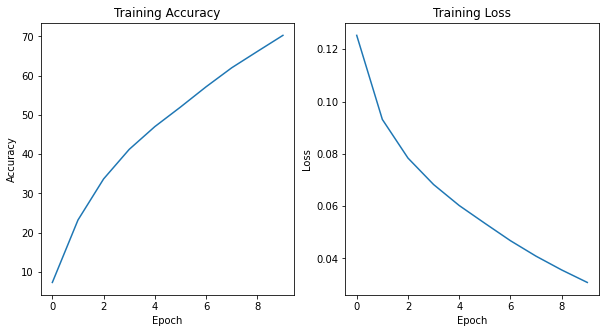

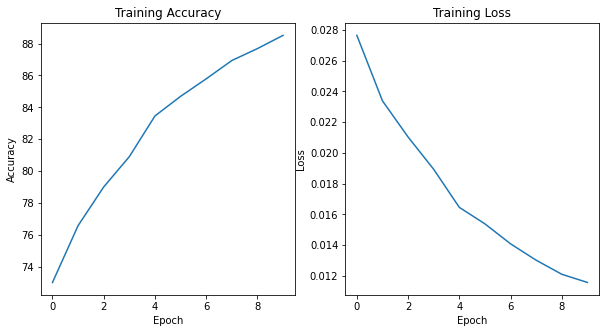

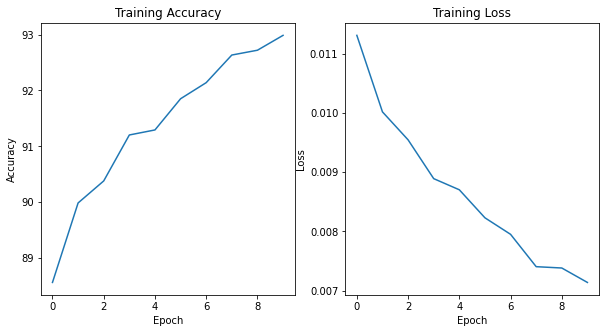

In [14]:
import torch.optim as optim

beta1_values = [0.7, 0.8, 0.9]
train_loss_history_adam1 = []
train_acc_history_adam1 = []
test_acc_history_adam1 = []
learning_rate = 0.001
num_epochs = 10
for beta1 in beta1_values:
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, betas=(beta1, 0.999))
    print('for beta1 = ',beta1)
    train_loss,train_acc = Train_f(trainloader,criterion,optimizer,num_epochs,model)
    train_loss_history_adam1.append(train_loss)
    train_acc_history_adam1.append(train_acc)
    test_acc = Test(model,testloader)
    test_acc_history_adam1.append(test_acc)

## Changing values of beta 2 parameter

for beta2:  0.999
Epoch 1 Loss 0.0073299809085391465, Accuracy 92.802%
Epoch 2 Loss 0.006565568127678707, Accuracy 93.502%
Epoch 3 Loss 0.006289511371939443, Accuracy 93.688%
Epoch 4 Loss 0.006231840486098081, Accuracy 93.834%
Epoch 5 Loss 0.005892707215896808, Accuracy 94.254%
Epoch 6 Loss 0.006188573746085167, Accuracy 94.006%
Epoch 7 Loss 0.005514977659583092, Accuracy 94.518%
Epoch 8 Loss 0.005729178491909988, Accuracy 94.478%
Epoch 9 Loss 0.005507416026634164, Accuracy 94.662%
Epoch 10 Loss 0.005378392419656738, Accuracy 94.774%
Test Loss: 4.3384 | Top-5 Testing Accuracy: 70.49%
for beta2:  0.9995
Epoch 1 Loss 0.005624452187567949, Accuracy 94.464%
Epoch 2 Loss 0.008287840127309319, Accuracy 92.716%
Epoch 3 Loss 0.005159858149359934, Accuracy 95.07%
Epoch 4 Loss 0.004225189044444124, Accuracy 95.998%
Epoch 5 Loss 0.004833522629449144, Accuracy 95.252%
Epoch 6 Loss 0.004607501723314636, Accuracy 95.508%
Epoch 7 Loss 0.004622372423070483, Accuracy 95.588%
Epoch 8 Loss 0.004552857985

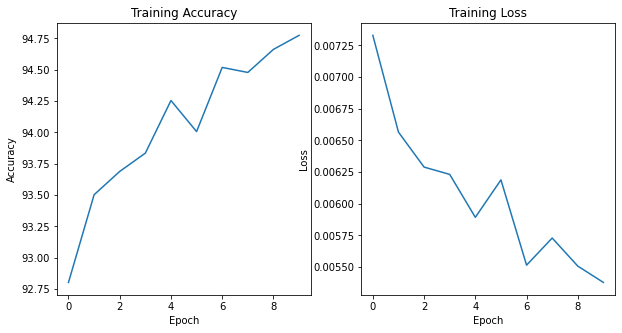

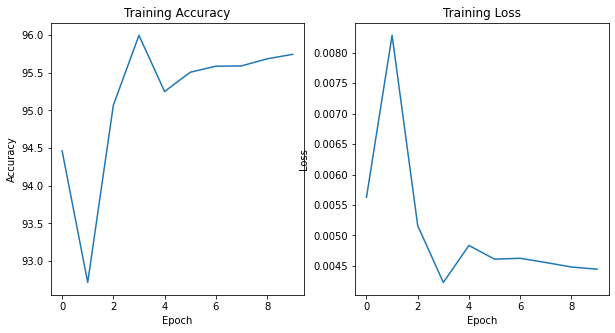

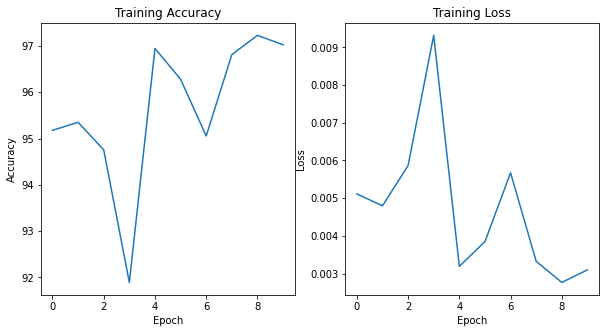

In [15]:
beta2_values = [ 0.999, 0.9995, 0.9999]

train_loss_history_adam2 = []
train_acc_history_adam2 = []
test_acc_history_adam2 = []

for beta2 in beta2_values:
    # Define the Adam optimizer with the current beta2 value
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, betas=(beta1, beta2))
    print('for beta2: ',beta2)
    # Train the model and evaluate on the test set as before
    train_loss,train_acc = Train_f(trainloader,criterion,optimizer,num_epochs,model)
    train_loss_history_adam2.append(train_loss)
    train_acc_history_adam2.append(train_acc)
    test_acc = Test(model,testloader)
    test_acc_history_adam2.append(test_acc)

##Changing the values of epsilon parameter

for epsilon value = :  1e-08
Epoch 1 Loss 0.1009542449092865, Accuracy 21.426%
Epoch 2 Loss 0.08131292842149734, Accuracy 32.68%
Epoch 3 Loss 0.0712435046339035, Accuracy 39.63%
Epoch 4 Loss 0.06327957778692246, Accuracy 45.106%
Epoch 5 Loss 0.058749554810523984, Accuracy 48.588%
Epoch 6 Loss 0.05459572794556618, Accuracy 51.644%
Epoch 7 Loss 0.05032659796357155, Accuracy 54.786%
Epoch 8 Loss 0.04346373272776604, Accuracy 60.244%
Epoch 9 Loss 0.03749136745929718, Accuracy 64.922%
Epoch 10 Loss 0.032363398286104204, Accuracy 69.12%
Test Loss: 2.0006 | Top-5 Testing Accuracy: 79.26%
for epsilon value = :  1e-06
Epoch 1 Loss 0.025871130309998987, Accuracy 74.55%
Epoch 2 Loss 0.019652898277342318, Accuracy 79.95%
Epoch 2 Loss 0.019652898277342318, Accuracy 79.95%
Epoch 3 Loss 0.015833361387103798, Accuracy 83.568%
Epoch 3 Loss 0.015833361387103798, Accuracy 83.568%
Epoch 4 Loss 0.013245465786010028, Accuracy 86.312%
Epoch 4 Loss 0.013245465786010028, Accuracy 86.312%
Epoch 5 Loss 0.0115286

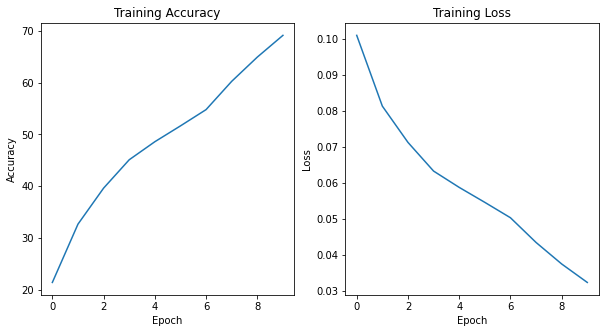

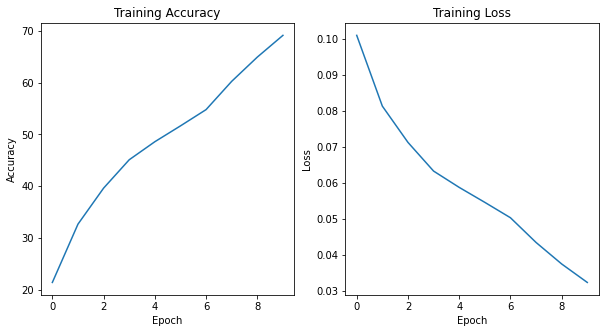

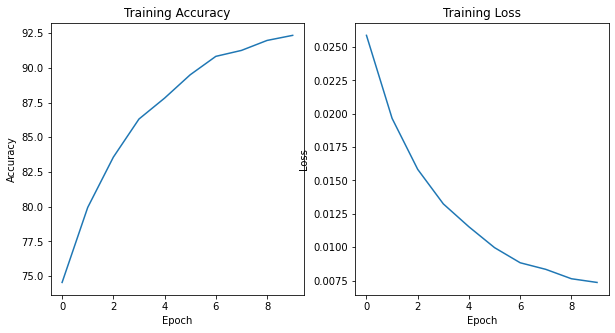

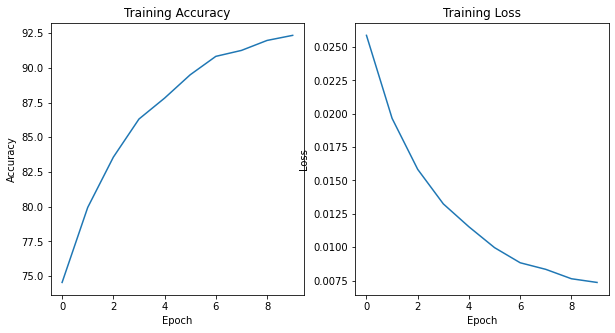

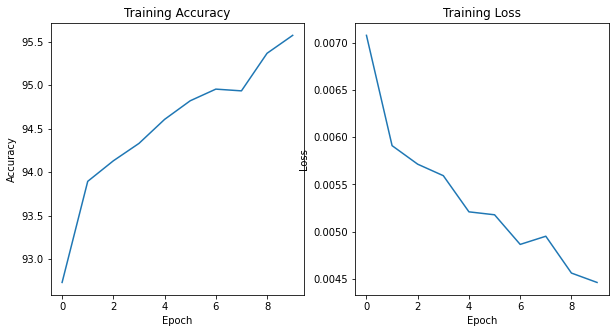

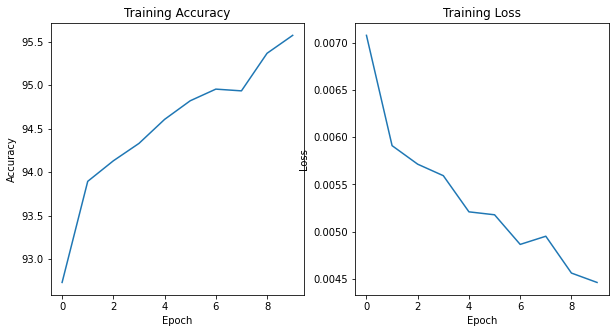

In [ ]:
epsilon_values = [1e-8, 1e-6,  1e-4]

train_loss_history_adam3 = []
train_acc_history_adam3 = []
test_acc_history_adam3 = []

for epsilon in epsilon_values:
    # Define the Adam optimizer with the current epsilon value
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, eps=epsilon)
    print('for epsilon value = : ',epsilon)
    # Train the model and evaluate on the test set as before
    train_loss,train_acc = Train_f(trainloader,criterion,optimizer,num_epochs,model)


    # Store the training and testing loss history
    train_loss_history_adam3.append(train_loss)
    train_acc_history_adam3.append(train_acc)
    test_acc = Test(model,testloader)
    test_acc_history_adam3.append(test_acc)

#RMSPROP

## changing the values of alpha

for value of alpha =  0.8
Epoch 1 Loss 0.0033492064676021983, Accuracy 96.972%
Epoch 2 Loss 0.003465810396733832, Accuracy 97.018%
Epoch 3 Loss 0.003557920285191722, Accuracy 97.09%
Epoch 4 Loss 0.003914224445392956, Accuracy 96.966%
Epoch 5 Loss 0.004328912774216392, Accuracy 96.75%
Epoch 6 Loss 0.004391936191652971, Accuracy 96.692%
Epoch 7 Loss 0.004823281514414887, Accuracy 96.61%
Epoch 8 Loss 0.005048875560495926, Accuracy 96.43%
Epoch 9 Loss 0.0052898783942734555, Accuracy 96.402%
Epoch 10 Loss 0.005234772663569752, Accuracy 96.212%
Test Loss: 9.1590 | Top-5 Testing Accuracy: 74.07%
for value of alpha =  0.9
Epoch 1 Loss 0.0067427351664226445, Accuracy 95.222%
Epoch 2 Loss 0.006333159390049405, Accuracy 95.358%
Epoch 3 Loss 0.0064571523769218035, Accuracy 95.198%
Epoch 4 Loss 0.006688703560240847, Accuracy 95.178%
Epoch 5 Loss 0.0068162126357961825, Accuracy 95.21%
Epoch 6 Loss 0.006772387086737599, Accuracy 95.196%
Epoch 7 Loss 0.007159625297307357, Accuracy 94.926%
Epoch 8 Loss

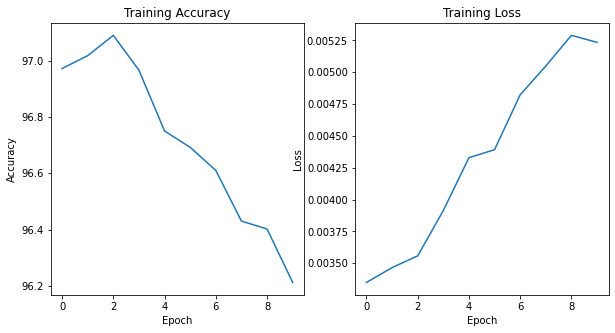

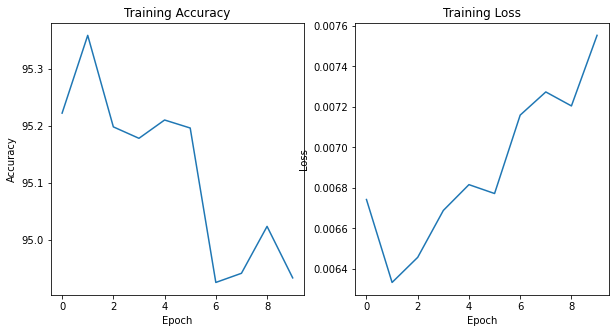

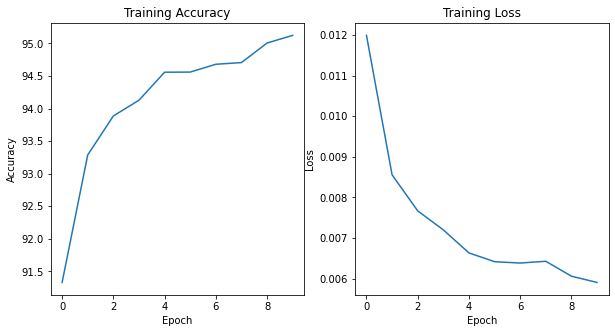

In [ ]:
import torch.optim as optim

# Define the range of alpha values to test
alpha_values = [0.8, 0.9,  0.99]

train_loss_history_rms1 = []
train_acc_history_rms1 = []
test_acc_history_rms1 = []

for alpha in alpha_values:
    # Define the RMSprop optimizer with the current alpha value
    optimizer = optim.RMSprop(model.parameters(), lr=learning_rate, alpha=alpha)
    print('for value of alpha = ',alpha)
    # Train the model and evaluate on the test set as before
    train_loss,train_acc = Train_f(trainloader,criterion,optimizer,num_epochs,model)
    # Store the training and testing loss history
    train_loss_history_rms1.append(train_loss)
    train_acc_history_rms1.append(train_acc)
    test_acc = Test(model,testloader)
    test_acc_history_rms1.append(test_acc)

##Changing the values of momentum parameter

for momentum =  0.0
Epoch 1 Loss 0.007736265650881687, Accuracy 93.782%
Epoch 2 Loss 0.005921802528976987, Accuracy 95.086%
Epoch 3 Loss 0.005676027994899195, Accuracy 95.188%
Epoch 4 Loss 0.0055906471130852875, Accuracy 95.362%
Epoch 5 Loss 0.005546687013228657, Accuracy 95.522%
Epoch 6 Loss 0.0054197837640820945, Accuracy 95.548%
Epoch 7 Loss 0.005365330049419754, Accuracy 95.64%
Epoch 8 Loss 0.005345709576135305, Accuracy 95.662%
Epoch 9 Loss 0.005396003948384241, Accuracy 95.65%
Epoch 10 Loss 0.005250460178833746, Accuracy 95.704%
Test Loss: 6.7118 | Top-5 Testing Accuracy: 73.46%
for momentum =  0.4
Epoch 1 Loss 0.01730829914717935, Accuracy 85.954%
Epoch 2 Loss 0.012903435085229576, Accuracy 89.056%
Epoch 3 Loss 0.012585533001124858, Accuracy 89.328%
Epoch 4 Loss 0.011993114997912198, Accuracy 89.574%
Epoch 5 Loss 0.011439991596229375, Accuracy 90.006%
Epoch 6 Loss 0.011178694205284119, Accuracy 90.328%
Epoch 7 Loss 0.010932556500751525, Accuracy 90.53%
Epoch 8 Loss 0.01061460090

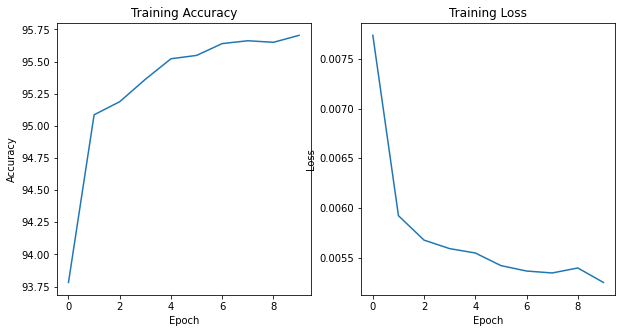

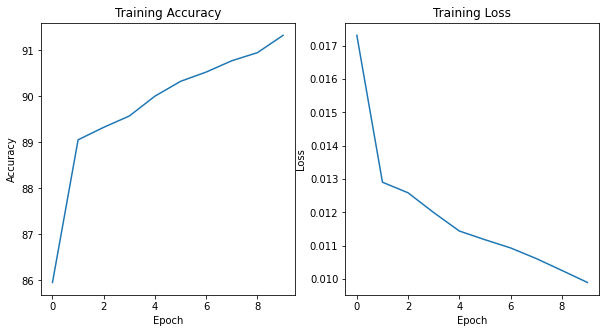

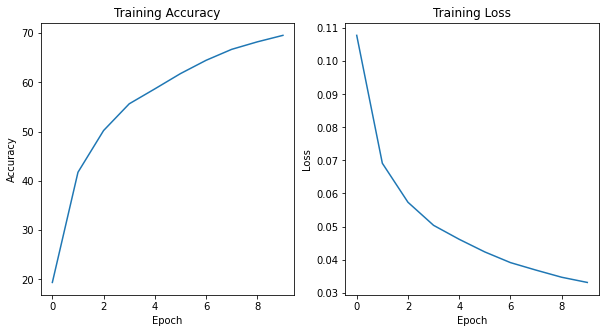

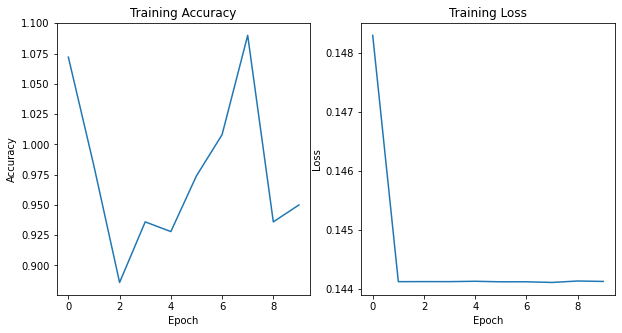

In [ ]:
import torch.optim as optim

# Define the range of momentum values to test
momentum_values = [0.0,0.4, 0.8, 0.9]

train_loss_history_rms2 = []
train_acc_history_rms2 = []
test_acc_history_rms2 = []

for momentum in momentum_values:
    # Define the RMSprop optimizer with the current momentum value
    optimizer = optim.RMSprop(model.parameters(), lr=learning_rate, momentum=momentum)
    print('for momentum = ',momentum)
    # Train the model and evaluate on the test set as before
    train_loss,train_acc = Train_f(trainloader,criterion,optimizer,num_epochs,model)

    # Store the training and testing loss history
    train_loss_history_rms2.append(train_loss)
    train_acc_history_rms2.append(train_acc)
    test_acc = Test(model,testloader)
    test_acc_history_rms2.append(test_acc)

##Changing the values of weight decay parameter

for weight_decay =  0.0
Epoch 1 Loss 0.1440395449733734, Accuracy 0.956%
Epoch 2 Loss 0.14399174361228942, Accuracy 0.876%
Epoch 3 Loss 0.14398349278450012, Accuracy 0.898%
Epoch 4 Loss 0.14398281703948976, Accuracy 0.88%
Epoch 5 Loss 0.14398223700523377, Accuracy 0.836%
Epoch 6 Loss 0.14398205081939697, Accuracy 0.888%
Epoch 7 Loss 0.14398211716651915, Accuracy 0.854%
Epoch 8 Loss 0.14398166964530945, Accuracy 0.858%
Epoch 9 Loss 0.14398242109298706, Accuracy 0.894%
Epoch 10 Loss 0.1439814170265198, Accuracy 0.936%
Test Loss: 4.6052 | Top-5 Testing Accuracy: 5.00%
for weight_decay =  0.001
Epoch 1 Loss 0.13561289283752442, Accuracy 3.576%
Epoch 2 Loss 0.12096482572078705, Accuracy 9.502%
Epoch 3 Loss 0.1142778942489624, Accuracy 13.25%
Epoch 4 Loss 0.10964846753120422, Accuracy 15.938%
Epoch 5 Loss 0.10626571518421173, Accuracy 17.84%
Epoch 6 Loss 0.10359312906265258, Accuracy 19.558%
Epoch 7 Loss 0.10128114743709564, Accuracy 21.006%
Epoch 8 Loss 0.09923574926376343, Accuracy 21.922%

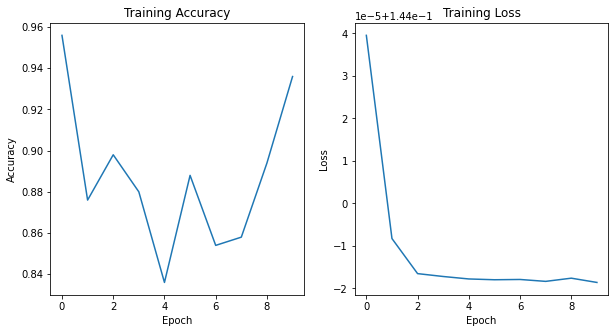

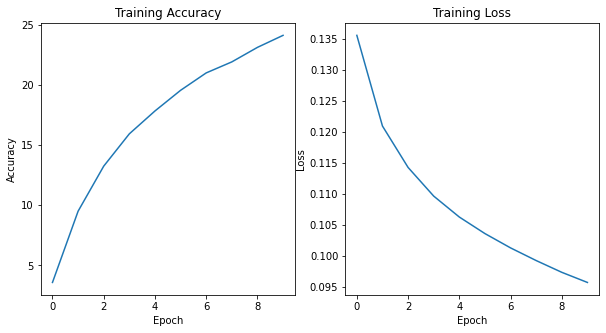

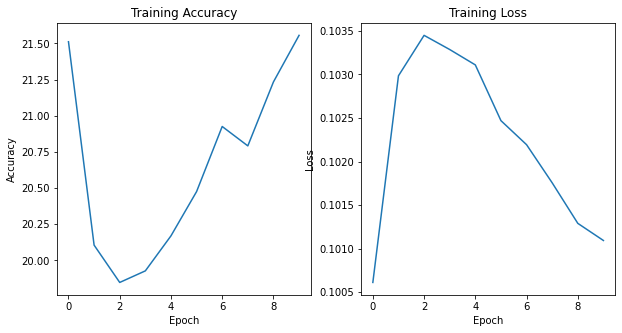

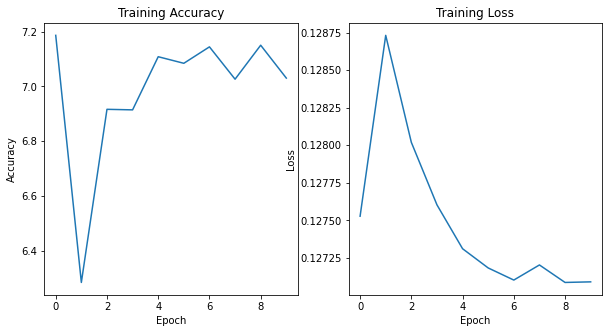

In [ ]:
import torch.optim as optim

# Define the range of weight decay values to test
weight_decay_values = [0.0,  1e-3, 1e-2, 1e-1]

train_loss_history_rms3 = []
train_acc_history_rms3 = []
test_acc_history_rms3 = []

for weight_decay in weight_decay_values:
    # Define the RMSprop optimizer with the current weight decay value
    optimizer = optim.RMSprop(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    print('for weight_decay = ',weight_decay)
    # Train the model and evaluate on the test set as before
    train_loss,train_acc = Train_f(trainloader,criterion,optimizer,num_epochs,model)

    # Store the training and testing loss history
    train_loss_history_rms3.append(train_loss)
    train_acc_history_rms3.append(train_acc)
    test_acc = Test(model,testloader)
    test_acc_history_rms3.append(test_acc)

#Adagrad

## Changing the values of weight decay

for weight_decay =  0.0
Epoch 1 Loss 0.125257288274765, Accuracy 7.854%
Epoch 2 Loss 0.12469065022468567, Accuracy 8.156%
Epoch 3 Loss 0.1245020401096344, Accuracy 8.18%
Epoch 4 Loss 0.12433555904388428, Accuracy 8.294%
Epoch 5 Loss 0.1241942218208313, Accuracy 8.4%
Epoch 6 Loss 0.12404814585208893, Accuracy 8.422%
Epoch 7 Loss 0.12389524195194244, Accuracy 8.504%
Epoch 8 Loss 0.12372471172332764, Accuracy 8.598%
Epoch 9 Loss 0.12356044179439545, Accuracy 8.638%
Epoch 10 Loss 0.12337868392467499, Accuracy 8.672%
Test Loss: 3.9688 | Top-5 Testing Accuracy: 27.73%
for weight_decay =  0.001
Epoch 1 Loss 0.12337010594367981, Accuracy 8.772%
Epoch 2 Loss 0.12312713686466217, Accuracy 8.888%
Epoch 3 Loss 0.12300523166179657, Accuracy 8.972%
Epoch 4 Loss 0.12289852176189422, Accuracy 8.994%
Epoch 5 Loss 0.12279615818977356, Accuracy 9.152%
Epoch 6 Loss 0.12270267922401429, Accuracy 9.132%
Epoch 7 Loss 0.12261802817344665, Accuracy 9.244%
Epoch 8 Loss 0.12253467688083648, Accuracy 9.28%
Epoch 

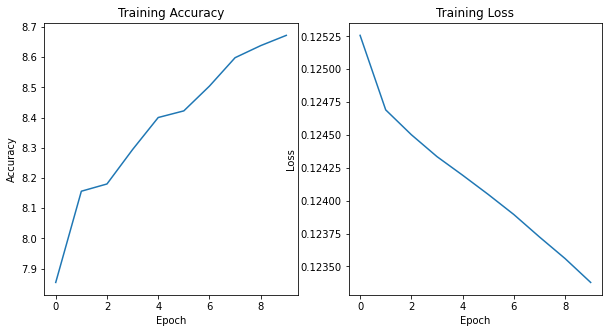

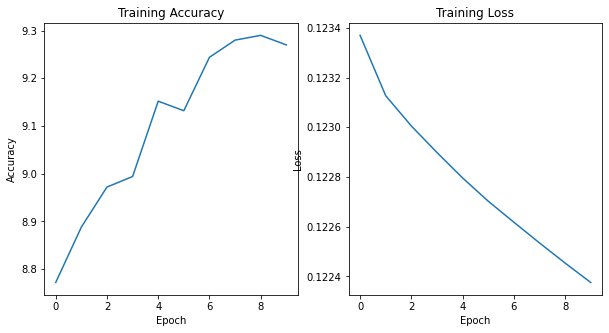

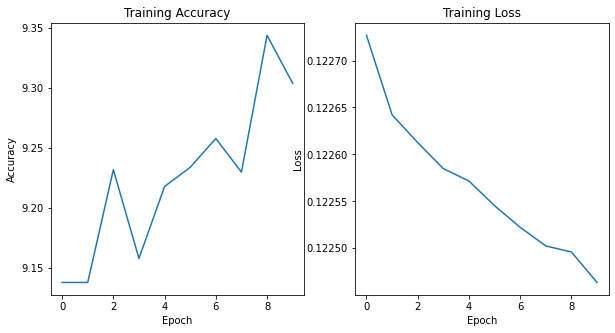

In [ ]:
weight_decay_values = [0.0, 0.001, 0.01]  # different weight decay values to try


train_loss_history_adag1 = []
train_acc_history_adag1 = []
test_acc_history_adag1 = []

for weight_decay in weight_decay_values:
    # Define the RMSprop optimizer with the current weight decay value
    optimizer = optim.Adagrad(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    print('for weight_decay = ',weight_decay)
    # Train the model and evaluate on the test set as before
    train_loss,train_acc = Train_f(trainloader,criterion,optimizer,num_epochs,model)

    # Store the training and testing loss history
    train_loss_history_adag1.append(train_loss)
    train_acc_history_adag1.append(train_acc)
    test_acc = Test(model,testloader)
    test_acc_history_adag1.append(test_acc)


## changing the values of lr_decay parameter

for lr_decay =  0.0
Epoch 1 Loss 0.0905404954814911, Accuracy 29.666%
Epoch 2 Loss 0.06838851004362106, Accuracy 42.7%
Epoch 3 Loss 0.06087165779113769, Accuracy 48.312%
Epoch 4 Loss 0.05569534453868866, Accuracy 51.922%
Epoch 5 Loss 0.0519995656979084, Accuracy 55.018%
Epoch 6 Loss 0.048714922086000444, Accuracy 57.316%
Epoch 7 Loss 0.04591482533216477, Accuracy 59.556%
Epoch 8 Loss 0.04391648185729981, Accuracy 61.392%
Epoch 9 Loss 0.041721268107891084, Accuracy 63.052%
Epoch 10 Loss 0.03975160528063774, Accuracy 64.604%
Test Loss: 1.7705 | Top-5 Testing Accuracy: 81.62%
for lr_decay =  1e-05
Epoch 1 Loss 0.04615577784180641, Accuracy 59.824%
Epoch 2 Loss 0.024053440820872785, Accuracy 77.316%
Epoch 3 Loss 0.016425097782611846, Accuracy 84.782%
Epoch 4 Loss 0.011365374957621098, Accuracy 90.08%
Epoch 5 Loss 0.007754052890464664, Accuracy 93.94%
Epoch 6 Loss 0.005199535894617438, Accuracy 96.494%
Epoch 7 Loss 0.003472034248709679, Accuracy 98.078%
Epoch 8 Loss 0.0023162372563034295, A

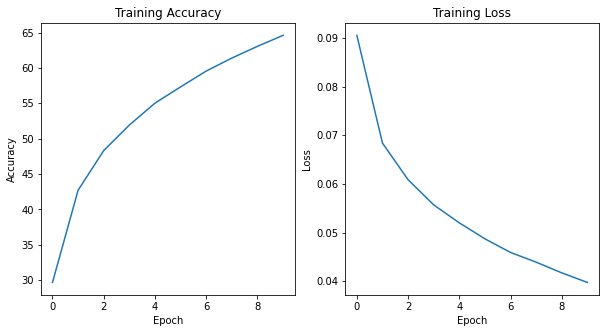

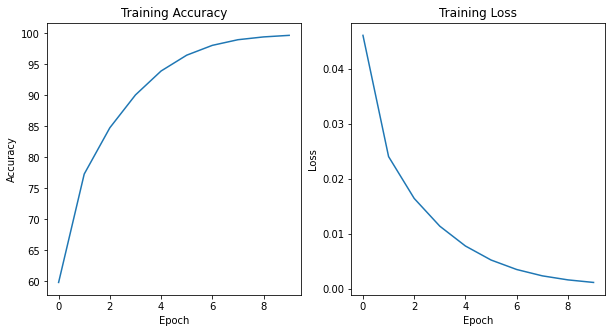

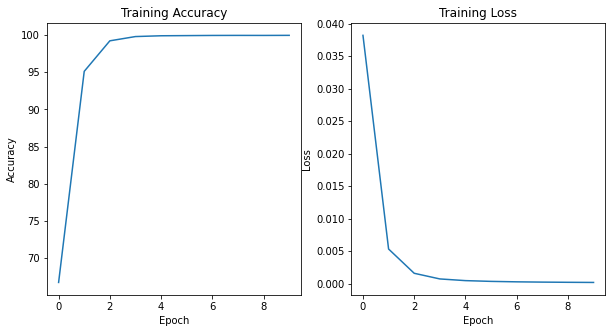

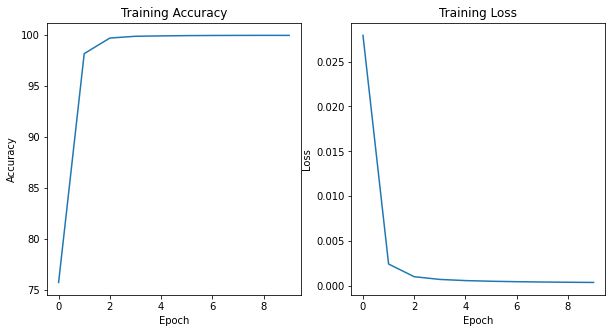

In [10]:
# Define the range of lr_decay values to try
lr_decay_values = [0.0, 1e-5, 1e-4, 1e-3]

train_loss_history_adag2 = []
train_acc_history_adag2 = []
test_acc_history_adag2 = []
learning_rate = 0.001

# Train the model with different lr_decay values
for lr_decay in lr_decay_values:
    # Define the Adagrad optimizer with the current lr_decay value
    optimizer = optim.Adagrad(model.parameters(), lr=learning_rate, lr_decay=lr_decay)
    print('for lr_decay = ',lr_decay)
    # Train the model and evaluate on the test set as before
    train_loss,train_acc = Train_f(trainloader,criterion,optimizer,num_epochs,model)

    # Store the training and testing loss history
    train_loss_history_adag2.append(train_loss)
    train_acc_history_adag2.append(train_acc)
    test_acc = Test(model,testloader)
    test_acc_history_adag2.append(test_acc)



##changing the value of initial_accumulator_value parameter

for initial_accumulator_value =  0.1
Epoch 1 Loss 0.00691636826634407, Accuracy 93.134%
Epoch 2 Loss 0.000898711787336506, Accuracy 99.454%
Epoch 3 Loss 0.0003346324043930508, Accuracy 99.898%
Epoch 4 Loss 0.00018839280425803735, Accuracy 99.938%
Epoch 5 Loss 0.0001406807027949253, Accuracy 99.942%
Epoch 6 Loss 0.00010569645340903662, Accuracy 99.954%
Epoch 7 Loss 0.00011623801025503781, Accuracy 99.938%
Epoch 8 Loss 0.00010578837080916855, Accuracy 99.944%
Epoch 9 Loss 8.955275586020434e-05, Accuracy 99.944%
Epoch 10 Loss 7.774143420247129e-05, Accuracy 99.95%
Test Loss: 4.5626 | Top-5 Testing Accuracy: 81.45%
for initial_accumulator_value =  0.5
Epoch 1 Loss 8.51073314261157e-05, Accuracy 99.948%
Epoch 2 Loss 0.00010947058516787365, Accuracy 99.926%
Epoch 3 Loss 6.786488600395386e-05, Accuracy 99.964%
Epoch 4 Loss 6.94684131941176e-05, Accuracy 99.954%
Epoch 5 Loss 6.267822213150794e-05, Accuracy 99.954%
Epoch 6 Loss 7.225614351147669e-05, Accuracy 99.952%
Epoch 7 Loss 5.702651471263

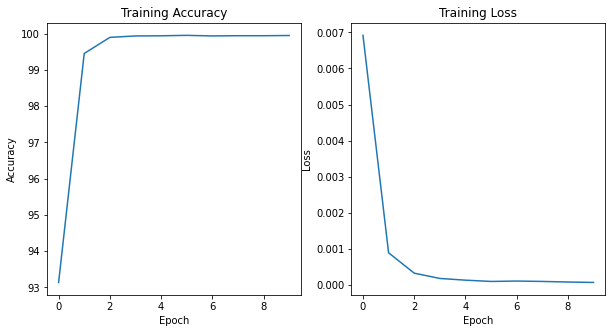

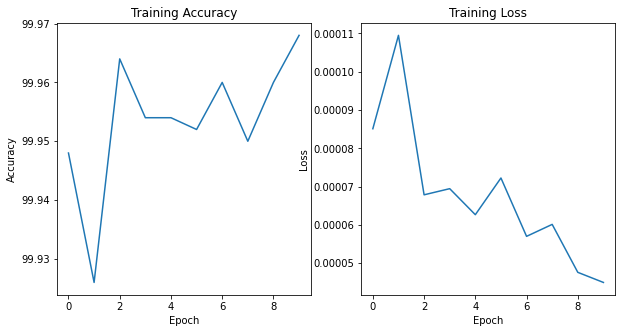

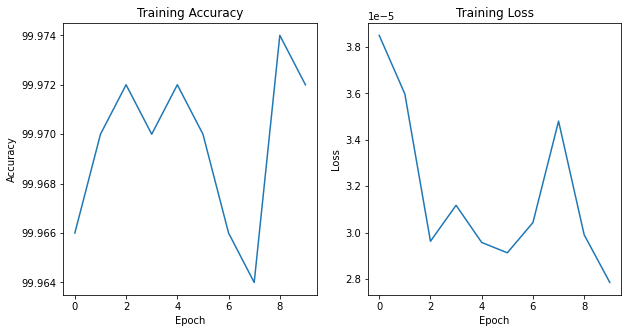

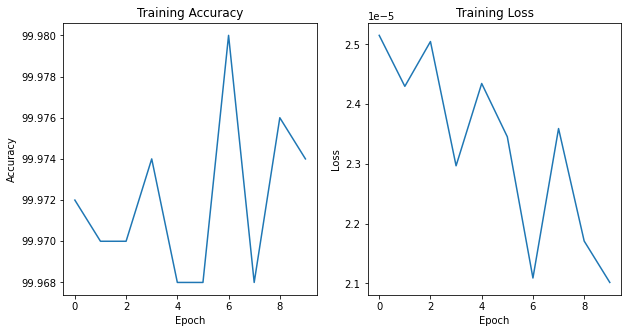

In [12]:
initial_accumulator_values = [0.1, 0.5, 1.0, 2.0]  # different initial accumulator values to try
train_loss_history_adag3 = []
train_acc_history_adag3 = []
test_acc_history_adag3 = []

for accumulator_value in initial_accumulator_values:
    # Define the Adagrad optimizer with the current initial accumulator value
    optimizer = optim.Adagrad(model.parameters(), lr=learning_rate, initial_accumulator_value=accumulator_value)
    print('for initial_accumulator_value = ',accumulator_value)
    # Train the model and evaluate on the test set as before
    train_loss,train_acc = Train_f(trainloader,criterion,optimizer,num_epochs,model)

    # Store the training and testing loss history
    train_loss_history_adag3.append(train_loss)
    train_acc_history_adag3.append(train_acc)
    test_acc = Test(model,testloader)
    test_acc_history_adag3.append(test_acc)




Conclusions: 

Adagrad performs the best on CIFAR 100 dataset giving maximum top5 test 
accuracy of 81.45%. This generally happens when the variance of gradients is high.
In the preprocessing part it was observed that the pretrained model was overfitting the data and hence I used some transformation to prevent the same.

Beta1 in Adam should be as close to 1 for faster convergence during the initial phase of training

Beta 2 in Adam should be small as it puts more weight on the past gradients and results in a smoother learning curve.

Epsilon in Adam should be small. The default value 1e-8 gives the best accuracy.

A smaller alpha value for RMSprop gives better test accuracy

Lower momentum values for RMSprop are performing better because high momentum values are causing overshooting and preventing convergence.
